In [ ]:
pip install imbalanced-learn

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [14]:
df = pd.read_csv("cleaned_cardiovascular_data.csv")

In [ ]:
class_0_data = df[df['CVD'] == 0]
class_1_data = df[df['CVD'] == 1]

In [15]:
min_class_size = min(len(class_0_data), len(class_1_data))

df_balanced = pd.concat([
    class_0_data.sample(min_class_size),
    class_1_data.sample(min_class_size)
])

In [16]:
X = df_balanced.drop(columns=['CVD'])  # Features
y = df_balanced['CVD']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [ ]:
X = df.drop(columns=['CVD'])
y = df['CVD'].apply(lambda x: 1 if x == "Yes" else 0) 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test_scaled)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.72
Confusion Matrix:
 [[7158 2112]
 [3066 6342]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      9270
           1       0.75      0.67      0.71      9408

    accuracy                           0.72     18678
   macro avg       0.73      0.72      0.72     18678
weighted avg       0.73      0.72      0.72     18678



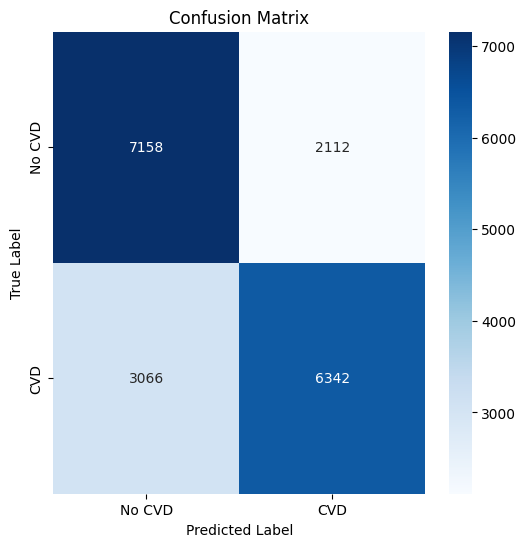

In [22]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No CVD', 'CVD'], yticklabels=['No CVD', 'CVD'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [23]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,CVD,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63219,99991,54,1,172,70.0,130,90,1,1,0,0,1,1,23.661439
63220,99992,58,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
63221,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
63222,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251
